<a href="https://colab.research.google.com/github/SebastianPre/ibio/blob/main/Laboratorio_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Laboratorio 7: Implementación algoritmo de Newton**
**Facultad de ingeniería, departamento de Ingeniería Biomédica, Universidad de los Andes**\
**IBIO-2440 Programación científica**

**Nombres de los integrantes**


1.   María Ángel Olascoaga Hoyos
2.   Juan Sebastián Preciado Villamil

**Número del grupo**

5

# **Método de Newton**
El método de Newton es una alternativa al algoritmo de descenso de gradiente al tener en cuenta la segunda derivada de la función que se desea optimizar. Considere la función $f: \mathbb{R}^n → \mathbb{R}$. Sea $x[k]\in\mathbb{R}^n$ el valor del candidato a solución en la iteración $k$. La regla de actualización en el método de Newton es:
\begin{align*}
  x[k+1] = x[k] - F^{-1}(x[k])∇f( x[k]),
\end{align*}
donde $F^{-1}(x[k])$ es la inversa de la Hessiana evaluada en x[k]. 

\\

El algoritmo completo se podría plantear de la siguiente manera:
0. Definir k=0, un parámetro de convergengia $ϵ$ y un número máximo de iteraciones $N_{max}$
1. Seleccionar un punto inicial $x[0]$
2. Calcular $∇f( x[k])$ y $F^{-1}(x[k])$
3. Calcular $x[k+1] = x[k] - F^{-1}(x[k])∇f( x[k])$
4. Si $||x[k+1]-x[k]||_2<ϵ$, parar. Si no, $k=k+1$ y volver al paso 2.


El objetivo de esta práctica es comparar el método de Newton con el algortimo de descenso de gradiente para minimizar una función de prueba dada con una condición de parada previamente definida. Para esto, considere la siguiente función:

\begin{align*}
 f(x) = (1-x_1)^2 + 5(x_2-x_1^2)^2,
\end{align*}

donde $x=[x_1,x_2]^T$. Con base en lo anterior, siga los siguientes pasos:





1. Encuentre el vector gradiente y la matriz Hessiana manualmente y escribalos a continuación.

\begin{align*}
    ∇f(x)=[-2+2x_1-20x_1x_2+20x_1^3,  10x_2-10x_1^2]^T
\end{align*}

\begin{align*}
    Hf(x)=[[2-20x_2+60x_1^2,-20x_1],[-20x_1,10]]
\end{align*}


**Responder aquí**

2. Implemente el método de Newton teniendo en cuenta las condición de parada mencionada anteriormente con los siguientes parámetros:

 - $ϵ=0.001$
 - $x[0]=[0,0]^T$


In [10]:
import numpy as np

def funcion(x):
    return (1-x[0])**2 + 5*(x[1]-x[0]**2)**2

def gradiente(x):
    return np.array([-2+2*x[0]-20*x[0]*x[1]+20*x[0]**3, 10*x[1]-10*x[0]**2])

def hessiana(x):
    return np.array([[2-20*x[1]+60*x[0]**2, -20*x[0]], [-20*x[0], 10]])

def newton(x0, eps):
  x = x0
  k = 0
  traj = [x0]
  while True:
        k += 1
        H = hessiana(x)
        g = gradiente(x)
        d = np.linalg.solve(H, -g)
        x_new = x + d
        traj.append(x_new)
        if np.linalg.norm(x_new - x) < eps:
            break
        x = x_new
  return x_new, traj, k

eps = 0.001
x0 = np.array([0, 0])
x_opt, traj, k = newton(x0, eps) 


3. Realice tres gráficas:

*   La trayectoria de $x[k]$ para los diferentes $k$ en un espacio de dos dimensiones. Es decir, los saltos que dió el algoritmo.
*   El valor la función objetivo vs número de iteraciones $k$.
*   El valor de $||x[k+1]-x[k]||_2$ vs número de iteraciones 



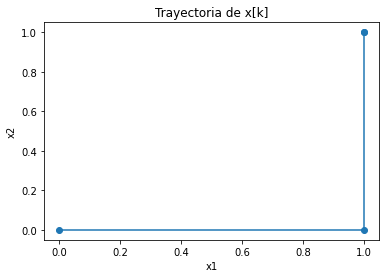

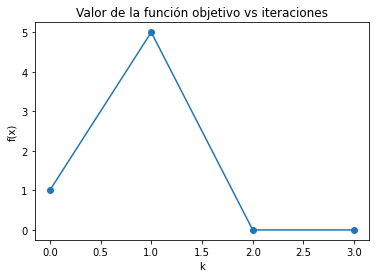

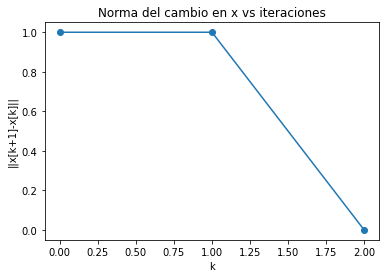

In [11]:
import matplotlib.pyplot as plt
x_opt, traj, k = newton(x0, eps)

#Gráfica de la trayectoria
traj = np.array(traj)
plt.plot(traj[:,0], traj[:,1], '-o')
plt.title('Trayectoria de x[k]')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Gráfica del valor de la función objetivo
f_vals = [funcion(x) for x in traj]
plt.plot(range(len(f_vals)), f_vals, '-o')
plt.title('Valor de la función objetivo vs iteraciones')
plt.xlabel('k')
plt.ylabel('f(x)')
plt.show()

# Gráfica de la norma del cambio en x
norms = [np.linalg.norm(traj[i+1] - traj[i]) for i in range(len(traj)-1)]
plt.plot(range(len(norms)), norms, '-o')
plt.title('Norma del cambio en x vs iteraciones')
plt.xlabel('k')
plt.ylabel('||x[k+1]-x[k]||')
plt.show()


4. Ahora, use el algortimo de descenso de gradiente hecho en prácticas anteriores para encontrar el mínimo de la función. Use $α=0.01$.

In [12]:
def des_grad(x0, alfa, eps):
  x = x0
  iteraciones = 1000
  for i in range(iteraciones):
    gradi = gradiente(x)
    y = x - np.multiply(alfa, gradi)
    if np.linalg.norm(y-x) < eps:
      break
    x = y
  return x
eps = 0.001
alfa = 0.01
x0 = np.array([0, 0])
x_opt = des_grad(x0, alfa, eps)
print("Solucion optima:", x_opt)
print("valor minimo:", funcion(x_opt))



Solucion optima: [0.8879371 0.7787337]
valor minimo: 0.013028407299352075


5. Para el algoritmo de descenso de gradiente implementado en el punto 4., realice tres gráficas:

*   La trayectoria de $x[k]$ para los diferentes $k$ en un espacio de dos dimensiones. Es decir, los saltos que dió el algoritmo.
*   El valor la función objetivo vs número de iteraciones $k$.
*   El valor de $||x[k+1]-x[k]||_2$ vs número de iteraciones 

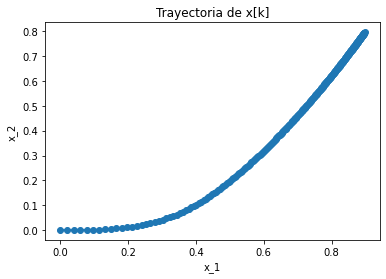

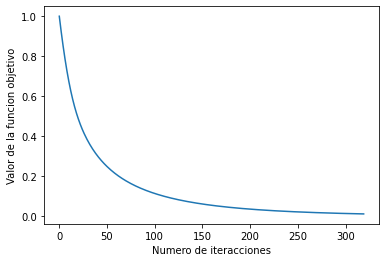

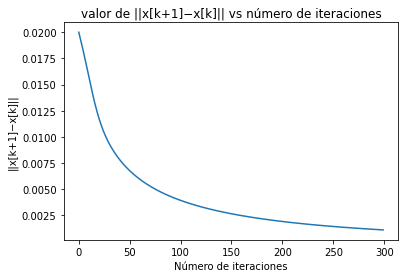

In [22]:
import matplotlib.pyplot as plt
import numpy as np
#gráfica de la trayectoria
def plot_trayectoria(x_trayectoria):
     x_1= [x[0] for x in x_trayectoria]
     x_2= [x[1]for x in x_trayectoria]
     plt.plot(x_1,x_2, 'o-')
     plt.xlabel('x_1')
     plt.ylabel('x_2')
     plt.title('Trayectoria de x[k]')
     plt.show()

x0=np.array([0,0])
eps=0.001
iteraciones=1000
alfa=0.01
x_trayectoria= [x0]  
x=x0
for i in range(iteraciones):
  gradi=gradiente(x)
  y=x - np.multiply(alfa,gradi)
  if np.linalg.norm(y-x)<eps:
          break 
  x=y
  x_trayectoria.append(y)
plot_trayectoria(x_trayectoria)

def plot_fobjetivo(f_trayectoria):
    plt.plot(f_trayectoria)
    plt.xlabel('Numero de iteracciones')
    plt.ylabel('Valor de la funcion objetivo')
    plt.show()
    
x0=np.array([0,0])
eps=0.001
iteraciones=1000
alfa=0.01
f_trayectoria=[funcion(x0)]
x=x0
for i in range(iteraciones):
  gradi=gradiente(x)
  y=x - np.multiply(alfa,gradi)
  f_p= funcion(y)
  if np.linalg.norm(y-x)< eps:
    break
  x=y
  f_trayectoria.append(f_p)
plot_fobjetivo(f_trayectoria)

def grad_desc(x0,alfa,eps):
    x=x0
    delta_x_list=[]
    iteraciones=300
    for i in range(iteraciones):
        gradi=gradiente(x)
        y=x - np.multiply(alfa,gradi)
        delta_x= np.linalg.norm(y-x)
        delta_x_list.append(delta_x)
        if delta_x < eps:
           break
        x=y
    return delta_x_list
x0=np.array([0,0])   
eps=0.001
iteraciones=300
alfa=0.01
delta_x_list= grad_desc(x0, alfa, eps)
plt.plot(delta_x_list)
plt.xlabel('Número de iteraciones')
plt.ylabel('||x[k+1]−x[k]||')
plt.title('valor de ||x[k+1]−x[k]|| vs número de iteraciones')
plt.show()





6. Responda las siguientes preguntas:

- ¿Por qué cree que al algoritmo de descenso de gradiente le cuesta más converger que el método de Newton?

El método de Newton puede lograr una convergencia más rápida que el algoritmo de descenso de gradiente, ya que tiene en cuenta información adicional sobre la forma de la función objetivo, específicamente, sobre la curvatura de la misma, mientras que el algoritmo de descenso de gradiente solo utiliza información sobre la pendiente o dirección de la función objetivo.

- Note el grado del polinómio de la función, ¿para qué grado polinómico el método de Newton converge en una sola iteración?

Para funciones de grado 2.

- ¿Cree que el punto inicial influye en la convergencia de ambos algortimos?

La selección del punto incial es una consideración importante en los algoritmos de optimización, tanto en el método de Newton como en el algoritmo de descenso de gradiente, debido a que puede influir en la velocidad y estabilidad de la convergencia. La elección del punto incial puede afectar la dirección de la pendiente y la curvatura de la función objetivo en ese punto, lo que puede tener un impacto significativo en la eficiencia y la estabilidad de los algoritmos de optimización. Por lo tanto, es importante elegir un buen punto inicial y ajustar los parámetros del algoritmo para obtener una convergencia óptima y estable.

- ¿Cómo podría mejorar la eficiencia del descenso de gradiente?

Se puede mejorar la eficiencia del algoritmo por medio de una adecuada selección de un tamaño de paso.